In [55]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('../data/raw/data.csv')

In [57]:
data.columns

Index(['Edad', 'Sexo', 'Trastorno de consciencia', 'Apache', 'Leucocitos',
       'Glucemia', 'Glucemia en  mg/dl', 'Ilg', 'Estado al egreso',
       'Cardiopatía isquémica', 'Artritis gotosa', 'Dm',
       'Ave isquémico sin secuelas', 'Cefalea migrañosa',
       'Erc sin hemodialisis', 'Epoc', 'Cataratas', 'Hepatitis c',
       'Operado de adenocarcinoma de próstata', 'Erc', 'Hta', 'Artritis',
       'Insuficiencia venosa profunda', 'Insuficiencia cardíaca',
       'Apnea del sueño', 'Ch', 'Hipotiroidismo', 'Fa', 'Salud anterior',
       'Glaucoma', 'Esquizofrenia', 'Insuficiencia venosa periférica',
       'Tumor de ovarios', 'Bnb nosocomial',
       'Insuficiencia respiratoria aguda', 'Sepsis intravascular',
       'Hiperglucemia', 'Bronconeumonía aspirativa',
       'Bronconeumonía asociada a la ventilación', 'Neumonía nosocomial',
       'Hipernatremia', 'Htec', 'Shock séptico', 'Pcr recuperado',
       'Convulsiones', 'Shock neurogénico', 'Bnb aspirativa'],
      dtype='object')

Text(0, 0.5, 'Frequency')

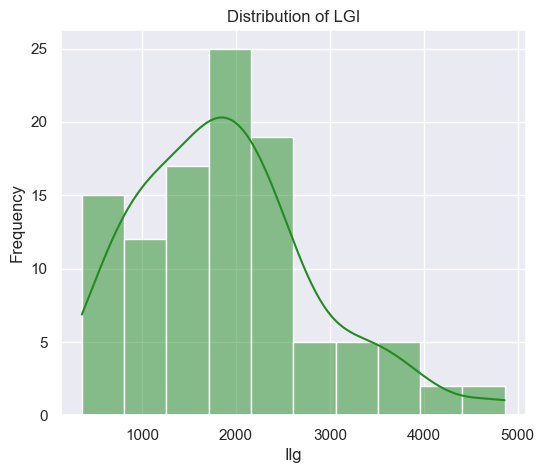

In [58]:
plt.figure(figsize=(6,5))
sns.set(style='darkgrid')
sns.histplot(data['Ilg'], color='forestgreen', kde=True)
plt.title('Distribution of LGI')
plt.ylabel('Frequency')

### Analyzing outliers

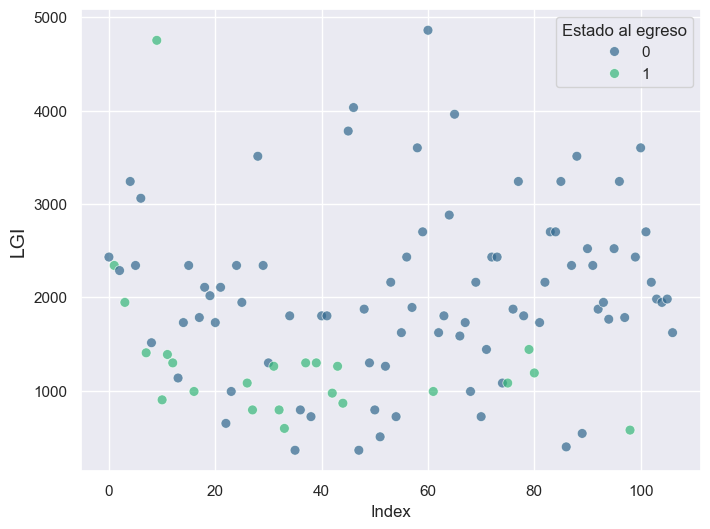

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.index, y='Ilg', data=data, hue='Estado al egreso', alpha=0.7, palette='viridis', s=50)
plt.ylabel('LGI', fontsize=14)
plt.xlabel('Index')
plt.show()

In [60]:
data.drop(data[ (data['Ilg'] > 3000) & (data['Estado al egreso'] == 1)].index, axis=0, inplace=True)

In [61]:
diseases = data.select_dtypes(include=bool).columns
diseases

Index(['Cardiopatía isquémica', 'Artritis gotosa', 'Dm',
       'Ave isquémico sin secuelas', 'Cefalea migrañosa',
       'Erc sin hemodialisis', 'Epoc', 'Cataratas', 'Hepatitis c',
       'Operado de adenocarcinoma de próstata', 'Erc', 'Hta', 'Artritis',
       'Insuficiencia venosa profunda', 'Insuficiencia cardíaca',
       'Apnea del sueño', 'Ch', 'Hipotiroidismo', 'Fa', 'Salud anterior',
       'Glaucoma', 'Esquizofrenia', 'Insuficiencia venosa periférica',
       'Tumor de ovarios', 'Bnb nosocomial',
       'Insuficiencia respiratoria aguda', 'Sepsis intravascular',
       'Hiperglucemia', 'Bronconeumonía aspirativa',
       'Bronconeumonía asociada a la ventilación', 'Neumonía nosocomial',
       'Hipernatremia', 'Htec', 'Shock séptico', 'Pcr recuperado',
       'Convulsiones', 'Shock neurogénico', 'Bnb aspirativa'],
      dtype='object')

In [62]:
disease_counts = data[diseases].sum()

disease_df = pd.DataFrame({
    'Parameter': disease_counts.index,
    'Frequency': disease_counts.values
})

/var/folders/z2/x55d_0sd3zl143hy_l05bnpr0000gn/T/ipykernel_32687/3529936427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Parameter', data=disease_df, palette='rocket')


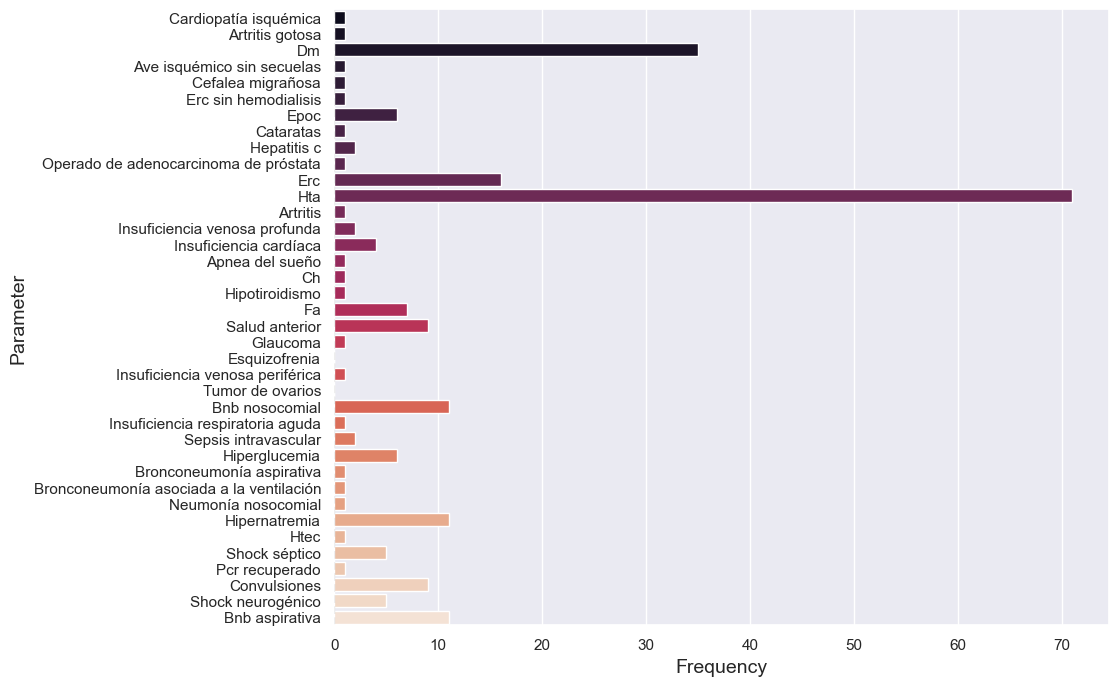

In [78]:

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Parameter', data=disease_df, palette='rocket')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Parameter', fontsize=14)
plt.axvline(0, color='grey', linestyle='--')
plt.show()

In [64]:
drops= ['Leucocitos', 'Glucemia', 'Glucemia en  mg/dl']
data.drop(columns=drops, axis=1, inplace=True)

In [65]:
data['Estado al egreso'].value_counts()

Estado al egreso
0    84
1    22
Name: count, dtype: int64

In [66]:
X, y = data.drop('Estado al egreso', axis=1), data['Estado al egreso']

In [67]:
variances = X.var(axis=0)
ind = variances[variances > 0.09].index
ind

Index(['Edad', 'Sexo', 'Trastorno de consciencia', 'Apache', 'Ilg', 'Dm',
       'Erc', 'Hta', 'Bnb nosocomial', 'Hipernatremia', 'Bnb aspirativa'],
      dtype='object')

In [68]:
X = X[ind]

In [69]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=8)

selector.fit_transform(X, y)

features = X.columns[selector.get_support(indices=True)]
features

Index(['Edad', 'Trastorno de consciencia', 'Apache', 'Ilg', 'Erc', 'Hta',
       'Bnb nosocomial', 'Hipernatremia'],
      dtype='object')

In [70]:
X = X[features]

In [71]:
matrix = X.join(y).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

Text(0.5, 1.0, 'Correlation Matrix Between Selected Features')

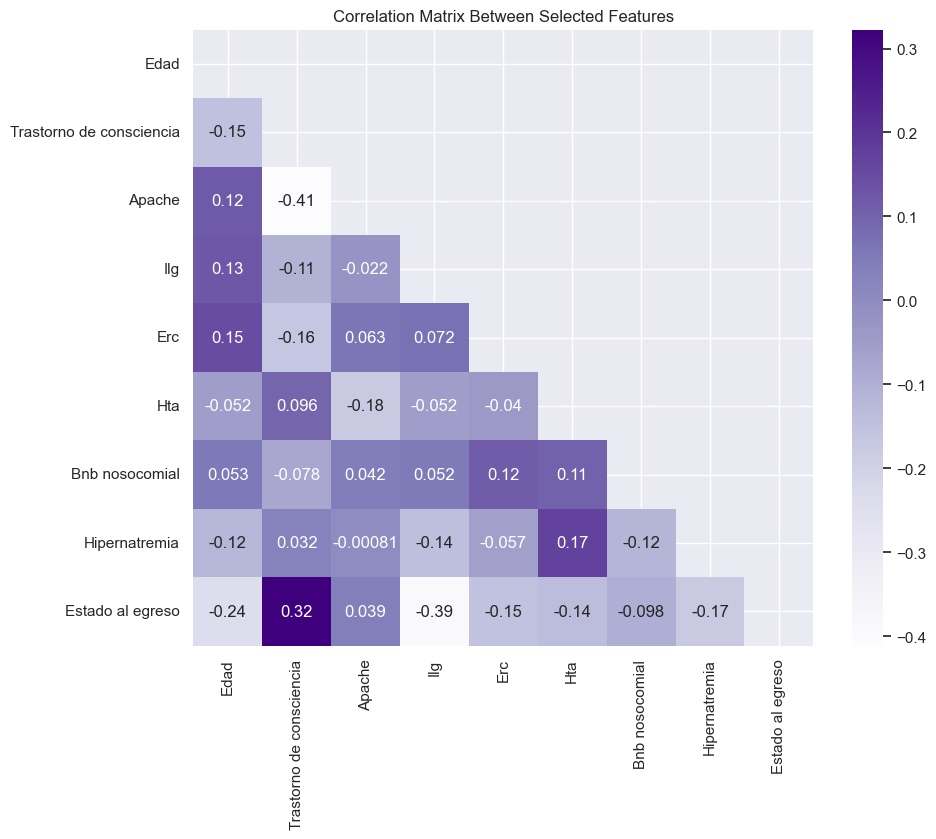

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='Purples', mask=mask)
plt.title('Correlation Matrix Between Selected Features')

### Applying SMOTE for data augmentation

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(X, y)

print(X.shape, y.shape)

(168, 8) (168,)


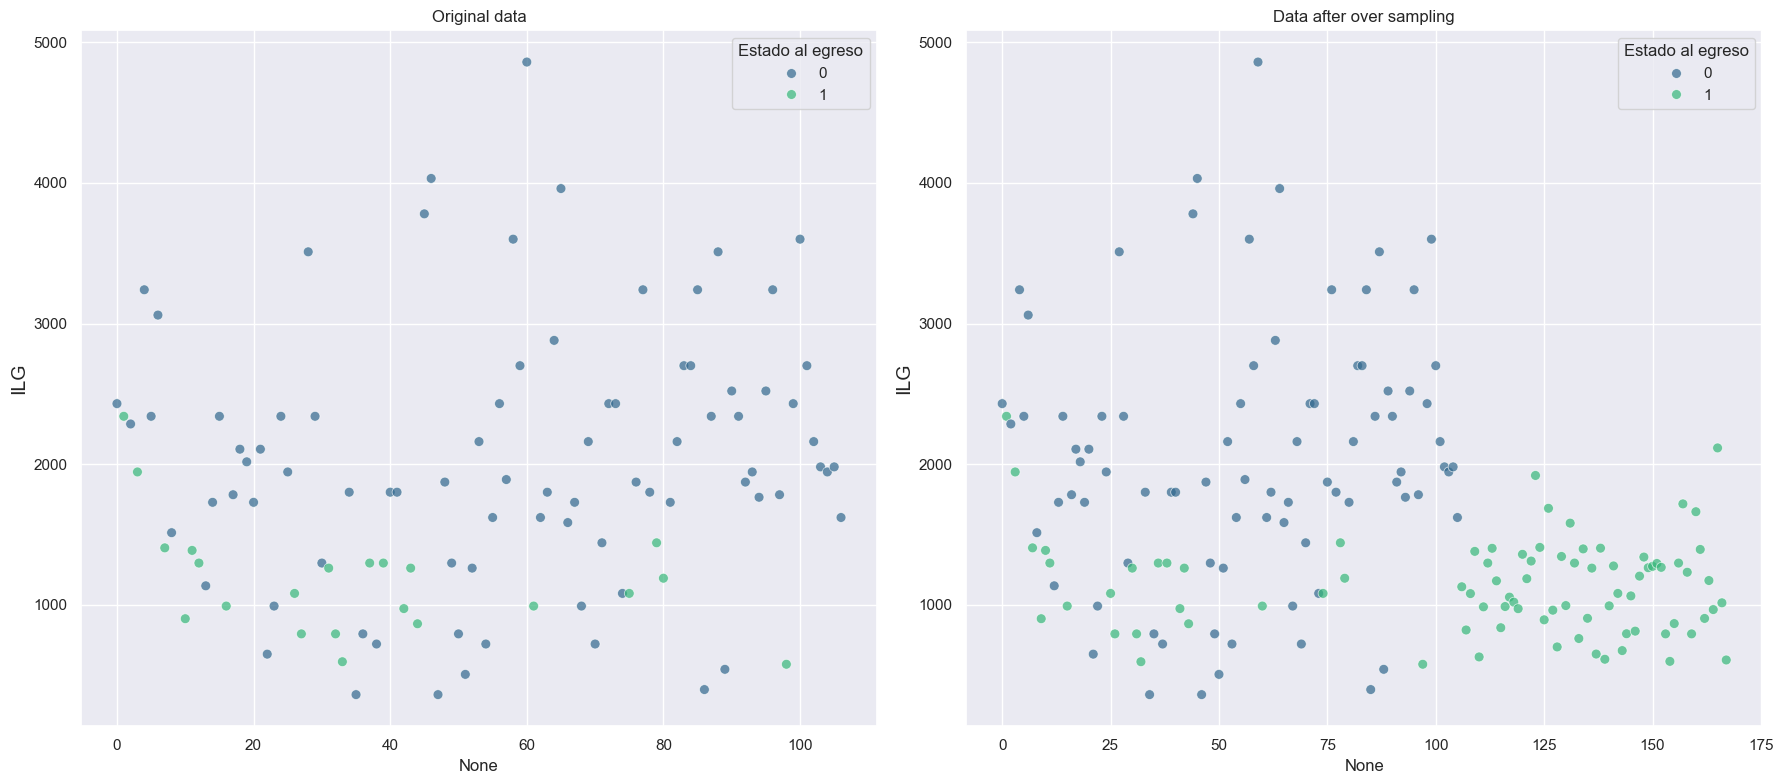

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  

sns.scatterplot(x=data.index, y='Ilg', data=data, hue='Estado al egreso', alpha=0.7, palette='viridis', s=50, ax=axs[0])
axs[0].set_ylabel('ILG', fontsize=14)
axs[0].set_title('Original data')

sns.scatterplot(x=X.index, y=X['Ilg'], hue=y, alpha=0.7, palette='viridis', s=50, ax=axs[1])
axs[1].set_ylabel('ILG', fontsize=14)
axs[1].set_title('Data after over sampling')

plt.tight_layout()
plt.show()

In [75]:
data = X.join(y)
data.to_csv('../data/processed/clf/data.csv', index=False)